# Descenso de Gradiente

En este Notebook vamos a implementar el Descenso de Gradiente para optimizar un modelo lineal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

### Creamos unos datos y un modelo lineal

In [2]:
data = np.array([[-1.920e+00,-1.422e+01,1.490e+00,-1.940e+00,-2.389e+00,-5.090e+00,
                 -8.861e+00,3.578e+00,-6.010e+00,-6.995e+00,3.634e+00,8.743e-01,
                 -1.096e+01,4.073e-01,-9.467e+00,8.560e+00,1.062e+01,-1.729e-01,
                  1.040e+01,-1.261e+01,1.574e-01,-1.304e+01,-2.156e+00,-1.210e+01,
                 -1.119e+01,2.902e+00,-8.220e+00,-1.179e+01,-8.391e+00,-4.505e+00],
                  [-1.051e+00,-2.482e-02,8.896e-01,-4.943e-01,-9.371e-01,4.306e-01,
                  9.577e-03,-7.944e-02 ,1.624e-01,-2.682e-01,-3.129e-01,8.303e-01,
                  -2.365e-02,5.098e-01,-2.777e-01,3.367e-01,1.927e-01,-2.222e-01,
                  6.352e-02,6.888e-03,3.224e-02,1.091e-02,-5.706e-01,-5.258e-02,
                  -3.666e-02,1.709e-01,-4.805e-02,2.008e-01,-1.904e-01,5.952e-01]]).T
print(f'data.shape: {data.shape}')

data.shape: (30, 2)


El filtro de Gabor se utiliza para analizar la frecuencia y la orientación de las señales.

En nuestro ejemplo, definiremos el siguiente filtro:

$$
y = \sin(\phi_0 + 0.06 \cdot \phi_1 \cdot x) \cdot \exp\left(-\frac{(\phi_0 + 0.06 \cdot \phi_1 \cdot x)^2}{32}\right)
$$

donde $ \phi = [\phi_0, \phi_1] $ son los parámetros del modelo que controlan la fase y la frecuencia.


In [3]:
def model(phi,x):
    #################################### COMPLETAR ####################################
    sin_component = np.sin(phi[0] + 0.06 * phi[1] * x)
    gauss_component = np.exp(-1/32 * ((phi[0]+ 0.06*phi[1]*x)**2))
    y_pred= sin_component * gauss_component
    return y_pred

In [4]:
def draw_model(data, model, phi, title=None):
    # Creamos un rango de valores para x entre 0 y 2 con un paso de 0.01
    x_model = np.arange(-15,15,0.1)
    # Evaluamos el modelo con los valores de x_model y el parámetro phi
    y_model = model(phi, x_model)
    # Creamos una figura y un eje para la gráfica
    fix, ax = plt.subplots()
    # Graficamos los puntos de datos (x, y) en color azul con marcadores 'o'
    ax.plot(data[:,0], data[:,1], 'bo')
    # Graficamos el modelo en color magenta con una línea continua
    ax.plot(x_model, y_model, 'm-')
    # Establecemos los límites de los ejes en el rango x e y
    ax.set_xlim([-15,15]);ax.set_ylim([-1,1])
    ax.set_xlabel('x'); ax.set_ylabel('y')
    # Etiquetamos los ejes x e y
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    # Si se proporciona un título, lo agregamos
    if title is not None:
        ax.set_title(title)
    # Mostramos la gráfica
    plt.show()


Iniciamos los valores del modelo lineal de forma arbitraria y visualizamos el modelo:

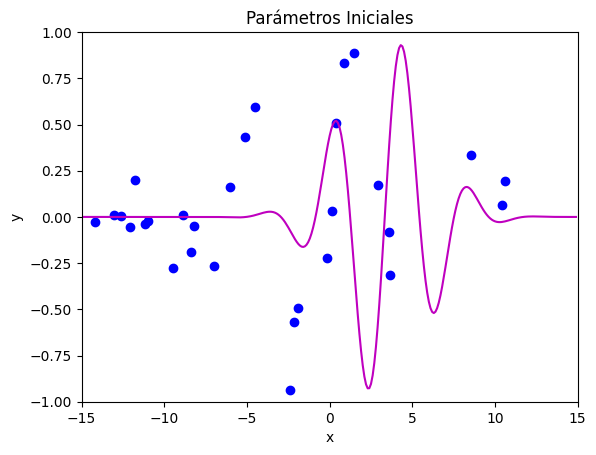

In [5]:
phi = np.zeros((2,1))
phi[0] =  -5     # Fase
phi[1] =  25     # Frecuencia
draw_model(data, model, phi, "Parámetros Iniciales")


Definimos la pérdida sobre los datos de entrenamiento. En concreto, usaremos el error de mínimos cuadrados:
$$
SE = \sum_i \mathcal{L}(\hat{y}^{(i)}, y^{(i)}) = \sum_i (\hat{y}^{(i)} - y^{(i)})^2
$$

In [6]:
def compute_loss(x, y, model, phi):
#################################### COMPLETAR ####################################
# Calcula el error de mínimos cuadrados
    y_pred = phi[0] + phi[1] *x
    loss = (np.sum(y_pred-y))**2

    return loss

Comprobamos que es correcta:

In [7]:
loss = compute_loss(data[:, 0],data[:, 1], model, np.array([[0.6], [-0.2]]))
print('Pérdida calculada = %3.3f, Pérdida correcta = %3.3f'%(loss, 16.419))

Pérdida calculada = 1602.260, Pérdida correcta = 16.419


Dibujamos la superficie de la pérdida (2D):

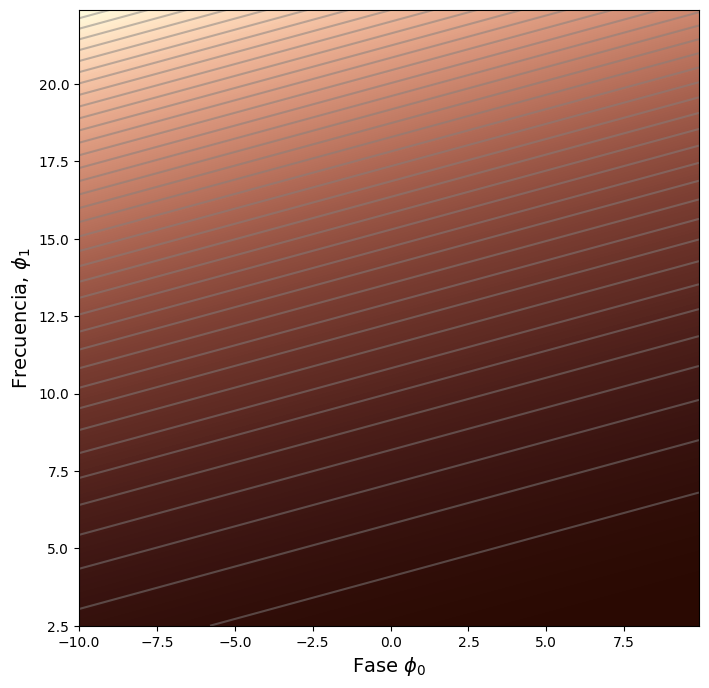

In [7]:
def draw_loss_function(compute_loss, data, model, phi_iters=None):
    # Definimos un colormap en formato hexadecimal
    my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
    # Convertimos los valores hexadecimales a decimales
    my_colormap_vals_dec = np.array([int(element, base=16) for element in my_colormap_vals_hex])
    r = np.floor(my_colormap_vals_dec / (256*256))  # Calculamos el canal rojo
    g = np.floor((my_colormap_vals_dec - r * 256 * 256) / 256)  # Calculamos el canal verde
    b = np.floor(my_colormap_vals_dec - r * 256 * 256 - g * 256)  # Calculamos el canal azul
    # Creamos el colormap utilizando los canales RGB
    my_colormap = ListedColormap(np.vstack((r, g, b)).transpose() / 255.0)

    # Creamos una malla de valores para los sesgos y las pendientes
    offsets_mesh, freqs_mesh = np.meshgrid(np.arange(-10,10.0,0.1), np.arange(2.5,22.5,0.1))

    loss_mesh = np.zeros_like(freqs_mesh)  # Inicializamos la malla de pérdidas con ceros

    # Calculamos la pérdida para cada conjunto de parámetros
    for idslope, slope in np.ndenumerate(freqs_mesh):
        loss_mesh[idslope] = compute_loss(data[:, 0], data[:, 1], model, np.array([[offsets_mesh[idslope]], [slope]]))

    # Creamos la figura y el eje para la gráfica
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 8)

    # Dibujamos el mapa de contornos
    ax.contourf(offsets_mesh, freqs_mesh, loss_mesh, 256, cmap=my_colormap)
    ax.contour(offsets_mesh, freqs_mesh, loss_mesh, 40, colors=['#80808080'])

    # Si se proporcionan iteraciones de parámetros, las graficamos
    if phi_iters is not None:
        ax.plot(phi_iters[0, :], phi_iters[1, :], 'ro-')

    # Ajustamos los límites del eje y y etiquetamos los ejes
    # ax.set_ylim([1, -1])
    ax.set_xlabel('Fase $\phi_{0}$', fontsize=14)
    ax.set_ylabel('Frecuencia, $\phi_{1}$', fontsize=14)

    # Mostramos la gráfica
    plt.show()

draw_loss_function(compute_loss, data, model)

Y en 3D:

In [8]:
import plotly.graph_objects as go

def draw_loss_function_3d(compute_loss, data, model, phi_iters=None):
    # Definimos un colormap en formato hexadecimal
    my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')

    # Creamos el colorscale para Plotly
    colorscale = []
    for i, hex_color in enumerate(my_colormap_vals_hex):
        # Convertimos el color hexadecimal a RGB
        r = int(hex_color[0:2], 16) / 255.0
        g = int(hex_color[2:4], 16) / 255.0
        b = int(hex_color[4:6], 16) / 255.0
        colorscale.append([i / (len(my_colormap_vals_hex) - 1), f'rgb({int(r * 255)},{int(g * 255)},{int(b * 255)})'])

    # Creamos una malla de valores para los sesgos y las pendientes
    offsets_mesh, freqs_mesh = np.meshgrid(np.arange(-10,10.0,0.1), np.arange(2.5,22.5,0.1))
    loss_mesh = np.zeros_like(freqs_mesh)  # Inicializamos la malla de pérdidas con ceros

    # Calculamos la pérdida para cada conjunto de parámetros
    for idslope, slope in np.ndenumerate(freqs_mesh):
        loss_mesh[idslope] = compute_loss(data[:, 0], data[:, 1], model, np.array([[offsets_mesh[idslope]], [slope]]))

    # Creamos la figura 3D utilizando Plotly
    fig = go.Figure()

    # Superficie 3D de la función de pérdida
    fig.add_trace(go.Surface(
        x=offsets_mesh,
        y=freqs_mesh,
        z=loss_mesh,
        colorscale=colorscale,  # Usamos el colormap definido
        showscale=True
    ))

    fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="white", project_z=True))

    # Si se proporcionan iteraciones de parámetros, las graficamos
    if phi_iters is not None:
        z_iters = [compute_loss(data[:, 0], data[:, 1], model, np.array([[phi_iters[0, i]], [phi_iters[1, i]]])) for i in range(phi_iters.shape[1])]
        fig.add_trace(go.Scatter3d(
            x=phi_iters[0, :],
            y=phi_iters[1, :],
            z=z_iters,
            mode='lines+markers',
            marker=dict(size=4, color='red'),
            line=dict(color='red', width=2),
            name='Iteraciones'
        ))

    # Ajustar el layout
    fig.update_layout(
        scene=dict(
            xaxis_title="Fase $\phi_{0}$",  # Usar doble barra invertida para LaTeX
            yaxis_title="Frecuencia $\phi_{1}$",
            zaxis_title="Pérdida"
        ),
        width=800,
        height=800
    )

    # Mostramos la gráfica
    fig.show()

draw_loss_function_3d(compute_loss, data, model, phi_iters=None)


Output hidden; open in https://colab.research.google.com to view.

Ahora, calculamos los gradientes de la función de pérdida
\begin{equation}
\frac{\partial L}{\partial \boldsymbol\phi} = \begin{bmatrix}\frac{\partial L}{\partial \phi_0} \\\frac{\partial L}{\partial \phi_1} \end{bmatrix}.
\end{equation}

In [9]:
def gabor_deriv_phi0(data_x,data_y,phi0, phi1):
    x = 0.06 * phi1 * data_x + phi0
    y = data_y
    cos_component = np.cos(x)
    sin_component = np.sin(x)
    gauss_component = np.exp(-0.5 * x *x / 16)
    deriv = cos_component * gauss_component - sin_component * gauss_component * x / 16
    deriv = 2* deriv * (sin_component * gauss_component - y)
    return np.sum(deriv)

def gabor_deriv_phi1(data_x, data_y,phi0, phi1):
    x = 0.06 * phi1 * data_x + phi0
    y = data_y
    cos_component = np.cos(x)
    sin_component = np.sin(x)
    gauss_component = np.exp(-0.5 * x *x / 16)
    deriv = 0.06 * data_x * cos_component * gauss_component - 0.06 * data_x*sin_component * gauss_component * x / 16
    deriv = 2*deriv * (sin_component * gauss_component - y)
    return np.sum(deriv)

def compute_gradient(data_x, data_y, model, phi):
    dl_dphi0 = gabor_deriv_phi0(data_x, data_y, phi[0],phi[1])
    dl_dphi1 = gabor_deriv_phi1(data_x, data_y, phi[0],phi[1])
    # Return the gradient
    return np.array([[dl_dphi0],[dl_dphi1]])

Comprobamos que, efectivamente, los gradientes calculados son correctos, comparándolos con una aproximación numérica haciendo uso de diferencias finitas:

\begin{align}
\frac{\partial L}{\partial \phi_{0}}&\approx & \frac{L[\phi_0+\delta, \phi_1]-L[\phi_0, \phi_1]}{\delta}\\
\frac{\partial L}{\partial \phi_{1}}&\approx & \frac{L[\phi_0, \phi_1+\delta]-L[\phi_0, \phi_1]}{\delta}
\end{align}

En este caso, usamos diferencias finitas adelantadas.

In [10]:
# Calculamos el gradiente
gradient = compute_gradient(data[:, 0], data[:, 1], model, phi)
print("Gradientes calculados: (%3.3f,%3.3f)" % (gradient[0].squeeze(), gradient[1].squeeze()))

# Aproximamos los gradientes usando diferencias finitas adelantadas
delta = 0.0001

# Calculamos una aproximación del gradiente con respecto a phi0 (sesgo)
dl_dphi0_est = (compute_loss(data[:, 0], data[:, 1], model, phi + np.array([[delta], [0]])) - compute_loss(data[:, 0], data[:, 1], model, phi)) / delta

# Calculamos una aproximación del gradiente con respecto a phi1 (pendiente)
dl_dphi1_est = (compute_loss(data[:, 0], data[:, 1], model, phi + np.array([[0], [delta]])) - compute_loss(data[:, 0], data[:, 1], model, phi)) / delta

# Mostramos las aproximaciones de los gradientes calculadas con diferencias finitas
print("Gradientes aproximados: (%3.3f,%3.3f)" % (dl_dphi0_est, dl_dphi1_est))


Gradientes calculados: (3.344,0.519)
Gradientes aproximados: (-173096.912,631250.767)


Por último, podemos aplicar el descenso de gradiente:
$$
 \boldsymbol\phi \leftarrow \boldsymbol\phi - \alpha \cdot \frac{\partial L}{\partial \boldsymbol\phi}
$$

fijando el paso de descenso $\alpha$ o bien haciendo uso de `line_search` visto anteriormente

In [11]:
def loss_function_1D(dist_prop, data, model, phi_start, search_direction):
    # Calculamos la pérdida en una dimensión (la del gradiente)
    return compute_loss(data[:, 0], data[:, 1], model, phi_start + search_direction * dist_prop)

def line_search(data, model, phi, gradient, thresh=.00001, max_dist=0.1, max_iter=15, verbose=False):
    # Inicializamos cuatro puntos a lo largo del rango que vamos a buscar
    a = 0
    b = 0.33 * max_dist
    c = 0.66 * max_dist
    d = 1.0 * max_dist
    n_iter = 0

    # Mientras no encontremos el mínimo con suficiente precisión o lleguemos al máximo de iteraciones, seguimos iterando
    while np.abs(b - c) > thresh and n_iter < max_iter:
        # Incrementamos el contador de iteraciones (para prevenir un bucle infinito)
        n_iter = n_iter + 1
        # Calculamos los valores de pérdida en los cuatro puntos
        lossa = loss_function_1D(a, data, model, phi, gradient)
        lossb = loss_function_1D(b, data, model, phi, gradient)
        lossc = loss_function_1D(c, data, model, phi, gradient)
        lossd = loss_function_1D(d, data, model, phi, gradient)

        if verbose:
            print('Iter %d, a=%3.3f, b=%3.3f, c=%3.3f, d=%3.3f' % (n_iter, a, b, c, d))
            print('a %f, b %f, c %f, d %f' % (lossa, lossb, lossc, lossd))

        # Regla #1: Si el punto A es menor que los puntos B, C y D, entonces reducimos la distancia desde A a los puntos B, C y D
        if np.argmin((lossa, lossb, lossc, lossd)) == 0:
            b = a + (b - a) / 2
            c = a + (c - a) / 2
            d = a + (d - a) / 2
            continue

        # Regla #2: Si el punto B es menor que el punto C, entonces
        #           el punto D se convierte en el punto C, y
        #           el punto B se convierte en 1/3 entre A y el nuevo D
        #           el punto C se convierte en 2/3 entre A y el nuevo D
        if lossb < lossc:
            d = c
            b = a + (d - a) / 3
            c = a + 2 * (d - a) / 3
            continue

        # Regla #3: Si el punto C es menor que el punto B, entonces
        #           el punto A se convierte en el punto B, y
        #           el punto B se convierte en 1/3 entre el nuevo A y D
        #           el punto C se convierte en 2/3 entre el nuevo A y D
        a = b
        b = a + (d - a) / 3
        c = a + 2 * (d - a) / 3

    # Devolvemos el promedio de los dos puntos del medio
    return (b + c) / 2.0


Calculamos una iteración del descenso de gradiente:

In [13]:
def gradient_descent_step(phi, data,  model, alpha=None):
#################################### COMPLETAR ####################################
    # 1. Calcula los gradientes con respecto a los parámetros
    grad =

    # 2. Si alpha= None, Obten el alpha óptimo usando `line_search` (ten en cuenta que la dirección de búsqueda es negativa, "-gradiente")
    if alpha is None:
        alpha =

    # 3. Actualiza los valores de phi con un paso de descenso
    phi =
    return phi

SyntaxError: invalid syntax (<ipython-input-13-b719950da1e2>, line 4)

In [ ]:
def plot_loss(losses):
    plt.plot(np.asarray(losses), '-r', label='train loss')
    plt.title('Learning curve (training)')
    plt.xlabel('iteration #')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Iteramos y visualizamos el resultado:

In [ ]:
# Inicializamos los parámetros y dibujamos el modelo
n_steps = 21  # Número de pasos en el descenso de gradiente
phi_all = np.zeros((2, n_steps + 1))  # Matriz para almacenar los parámetros
phi_all[0, 0] = -1.5  # Valor inicial del sesgo
phi_all[1, 0] = 8.5  # Valor inicial de la pendiente

# Medimos la pérdida y dibujamos el modelo inicial
loss = compute_loss(data[:, 0], data[:, 1], model, phi_all[:, 0:1])  # Calculamos la pérdida inicial
draw_model(data, model, phi_all[:, 0:1], "Parámetros iniciales, Pérdida = %f" % (loss))

losses = []

# Realizamos repetidamente pasos de descenso de gradiente
for c_step in range(n_steps):
    # Realizamos un paso de descenso de gradiente
    phi_all[:, c_step + 1:c_step + 2] = gradient_descent_step(phi_all[:, c_step:c_step + 1], data, model, alpha=None) # Prueba con distintos valores de alpha

    # Medimos la pérdida y dibujamos el modelo
    loss = compute_loss(data[:, 0], data[:, 1], model, phi_all[:, c_step + 1:c_step + 2])  # Calculamos la pérdida
    losses.append(loss)

draw_model(data, model, phi_all[:, c_step + 1], "Iteración %d, pérdida = %f" % (c_step + 1, loss))  # Dibujamos el modelo

# Dibujamos la trayectoria en la función de pérdida en 2D y 3D
draw_loss_function(compute_loss, data, model, phi_all)
draw_loss_function_3d(compute_loss, data, model, phi_iters=phi_all)
plot_loss(losses)

Podemos comparar el resultado fijando el paso de descenso a $\alpha = 0.2$

In [ ]:
# Inicializamos los parámetros y dibujamos el modelo
n_steps = 21  # Número de pasos en el descenso de gradiente
phi_all = np.zeros((2, n_steps + 1))  # Matriz para almacenar los parámetros
phi_all[0, 0] = -1.5  # Valor inicial del sesgo
phi_all[1, 0] = 8.5  # Valor inicial de la pendiente

# Medimos la pérdida y dibujamos el modelo inicial
loss = compute_loss(data[:, 0], data[:, 1], model, phi_all[:, 0:1])  # Calculamos la pérdida inicial
draw_model(data, model, phi_all[:, 0:1], "Parámetros iniciales, Pérdida = %f" % (loss))
losses = []
# Realizamos repetidamente pasos de descenso de gradiente
for c_step in range(n_steps):
    # Realizamos un paso de descenso de gradiente
    phi_all[:, c_step + 1:c_step + 2] = gradient_descent_step(phi_all[:, c_step:c_step + 1], data, model, alpha=0.2) # Prueba con distintos valores de alpha

    # Medimos la pérdida y dibujamos el modelo
    loss = compute_loss(data[:, 0], data[:, 1], model, phi_all[:, c_step + 1:c_step + 2])  # Calculamos la pérdida
    losses.append(loss)

draw_model(data, model, phi_all[:, c_step + 1], "Iteración %d, pérdida = %f" % (c_step + 1, loss))  # Dibujamos el modelo
# Dibujamos la trayectoria en la función de pérdida en 2D y 3D
draw_loss_function(compute_loss, data, model, phi_all)
draw_loss_function_3d(compute_loss, data, model, phi_iters=phi_all)
plot_loss(losses)

Ahora, vamos a implementar el gradiente estocástico a partir de la función `compute_gradient` anterior:

In [ ]:
def stochastic_gradient_descent_step(phi, data, model, alpha, batch_size):
    #################################### COMPLETAR ####################################
    # Obtener el número total de datos
    n_data =

    # Generar una permutación aleatoria de los índices
    indices =

    # Seleccionar los primeros 'batch_size' índices de la permutación
    batch_indices =

    # Extraer el subconjunto de datos correspondiente a los índices seleccionados
    batch_data = data[batch_indices,:]
    ################################## Fin COMPLETAR ##################################

    # Calcular el gradiente solo utilizando el subconjunto de datos
    grad = compute_gradient(batch_data[:, 0], batch_data[:, 1], model, phi)

    # Actualizar los parámetros en la dirección opuesta al gradiente
    phi = phi - alpha * grad

    return phi

Ejecutamos de nuevo:

In [ ]:
np.random.seed(1)
# Inicializamos los parámetros y dibujamos el modelo
n_steps = 2000  # Número de pasos en el descenso de gradiente
phi_all = np.zeros((2, n_steps + 1))  # Matriz para almacenar los parámetros
phi_all[0, 0] = 3.5  # Valor inicial del sesgo
phi_all[1, 0] = 6.5  # Valor inicial de la pendiente

# Medimos la pérdida y dibujamos el modelo inicial
loss = compute_loss(data[:, 0], data[:, 1], model, phi_all[:, 0:1])  # Calculamos la pérdida inicial
draw_model(data, model, phi_all[:, 0:1], "Parámetros iniciales, Pérdida = %f" % (loss))
losses = []

# Realizamos repetidamente pasos de descenso de gradiente
for c_step in range(n_steps):
    # Realizamos un paso de descenso de gradiente
    phi_all[:, c_step + 1:c_step + 2] = stochastic_gradient_descent_step(phi_all[:, c_step:c_step + 1], data, model, alpha=0.8, batch_size = 5) # Prueba con distintos valores batch_size

    # Medimos la pérdida y dibujamos el modelo
    loss = compute_loss(data[:, 0], data[:, 1], model, phi_all[:, c_step + 1:c_step + 2])  # Calculamos la pérdida
    losses.append(loss)
draw_model(data, model, phi_all[:, c_step + 1], "Iteración %d, pérdida = %f" % (c_step + 1, loss))  # Dibujamos el modelo

# Dibujamos la trayectoria en la función de pérdida en 2D y 3D
draw_loss_function(compute_loss, data, model, phi_all)
draw_loss_function_3d(compute_loss, data, model, phi_iters=phi_all)
plot_loss(losses)

<div style="background-color: lightblue; padding: 10px; border-radius: 5px; font-style: italic;">
  Prueba con distintos valores de 'learning_rate' ($\alpha$), 'batch_size', así como valores de inicialización de los parámetros.
</div>

Implementa un learning rate scheduler de tal forma que $\alpha$ se reducza un factor $\beta$ cada $M$ iteraciones


In [ ]:
# #################################### COMPLETAR ####################################
